# Linear Regression Example

Predict if a startup is going to be profitable.

### Processing steps
- Loading dataset 
- Exploring data
- Setting up the dataframe
- Creating training and test dataset
- Building a **Linear Regression Model**
- Exploring trained model **performance**
- Making predictions using test dataset
- Exploring model performance comparing actual v/s predictions


In [1]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')
pd.set_option('precision', 2)

**Loading the data**

In [2]:
# reading data
df = pd.read_csv('../data/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Exploring the data**

In [4]:
# displaying the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# getting the data description
pd.set_option('precision', 2)
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.79,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


In [6]:
# getting data desc incl. "states"
df.describe(include = 'object')

,State
count,50
unique,3
top,California
freq,17


In [7]:
# checking counts of "state"
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [8]:
# creating a list of states
states = df['State'].values
states

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

**Processing State categorical value**

In [9]:
df = pd.get_dummies(df, columns = ['State'], drop_first = False)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
# moving target column tp the end 
profit = df.pop('Profit')
df['Profit'] = profit
df.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


**Plotting R&D Spend and Profit**

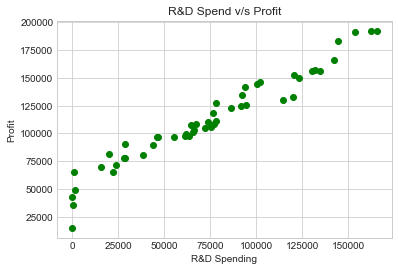

In [11]:
# plotting spend x profit
plt.scatter(x = df['R&D Spend'], y = df['Profit'], color='green')
plt.xlabel('R&D Spending')
plt.ylabel('Profit')
plt.title('R&D Spend v/s Profit')
plt.show()

In [12]:
# removing "Profit" column
cols = df.columns
cols = cols.drop('Profit')
cols

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_California',
       'State_Florida', 'State_New York'],
      dtype='object')

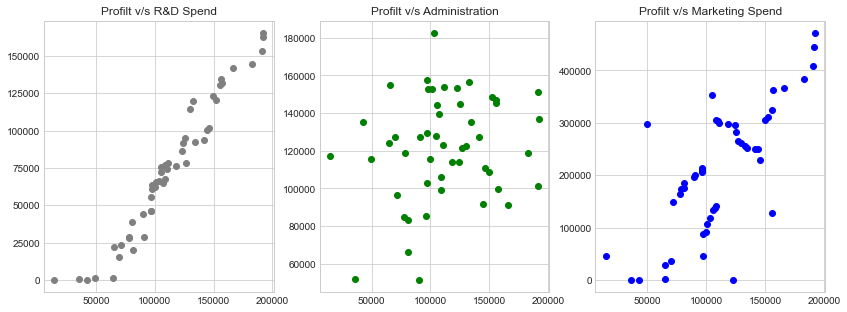

In [13]:
# multi-plotting
plt.rc('figure', figsize=(14, 5))
fig, axs = plt.subplots(1, 3)
axs[0].scatter(df['Profit'], df[cols[0]], color='gray') 
axs[0].set_title(f'Profilt v/s {cols[0]}')
axs[1].scatter(df['Profit'], df[cols[1]], color='green')
axs[1].set_title(f'Profilt v/s {cols[1]}')
axs[2].scatter(df['Profit'], df[cols[2]], color='blue')
axs[2].set_title(f'Profilt v/s {cols[2]}')

plt.show()

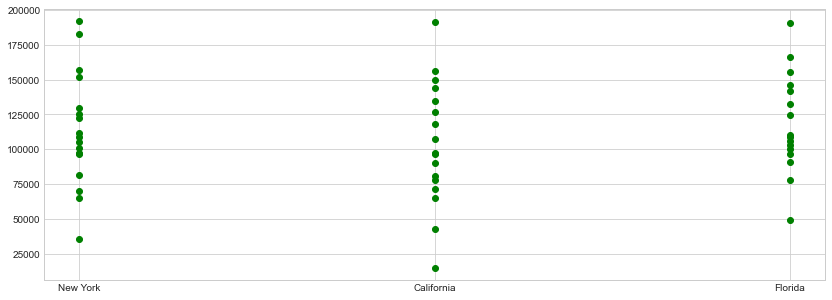

In [14]:
# plotting "Profit" / "State"
fig, ax = plt.subplots()
ax.scatter( states, df['Profit'], color='green')
plt.show()

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')


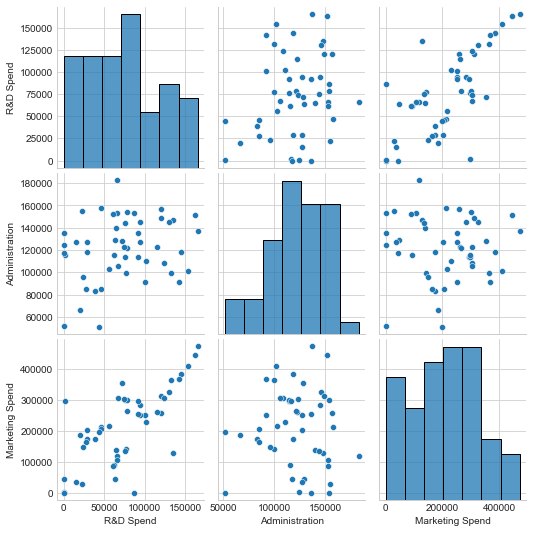

In [15]:
# multi plotting
plt.rc('figure', figsize=(14, 5))
toplot = cols.drop("State_California")
toplot = toplot.drop("State_New York")
toplot = toplot.drop("State_Florida")
print(toplot)
sns.pairplot(df[toplot])
plt.show()

**Checking correlation between features and price**

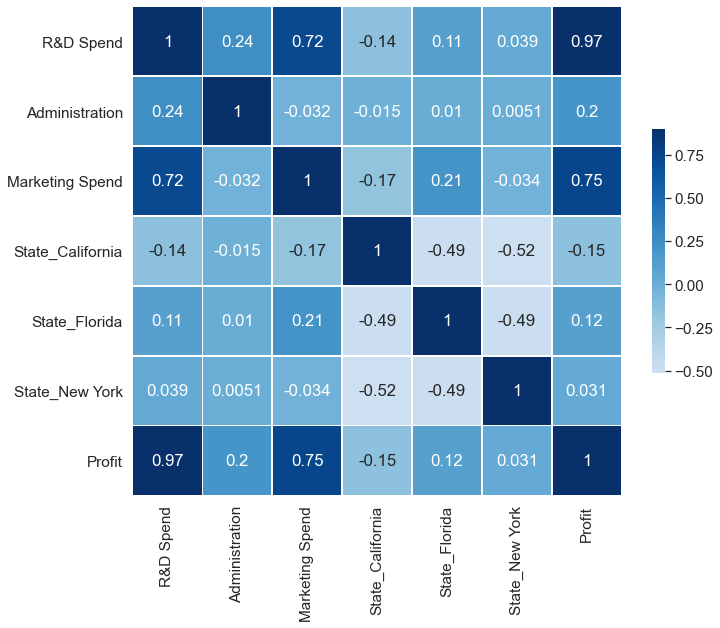

In [16]:
# checking correlation
corr = df.corr()
sns.set(font_scale=1.4)
f, ax = plt.subplots(figsize=(11, 9))

# drawing a heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap = "Blues", vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

**Displaying all features "null" count

In [17]:
# checking if there are any null values in our features
df.isnull().sum()

R&D Spend           0
Administration      0
Marketing Spend     0
State_California    0
State_Florida       0
State_New York      0
Profit              0
dtype: int64

**Standardizing features that require scaling**

In [18]:
# standardazing features
scaler = StandardScaler()
tostd = ['R&D Spend', 'Marketing Spend', 'Administration']
df[tostd] = scaler.fit_transform(df[tostd])
df.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,2.02,0.56,2.15,0,0,1,192261.83
1,1.96,1.08,1.92,1,0,0,191792.06
2,1.75,-0.73,1.63,0,1,0,191050.39
3,1.55,-0.10,1.42,0,0,1,182901.99
4,1.50,-1.08,1.28,0,1,0,166187.94


**Creating X and Y sets**

In [19]:
# creating sets of data
cols = list(df.columns)
cols.remove('Profit')
X = df[cols].values

In [20]:
# checking first values
X[:3]

array([[ 2.01641149,  0.56075291,  2.15394309,  0.        ,  0.        ,
         1.        ],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.        ,  0.        ,
         0.        ],
       [ 1.75436374, -0.72825703,  1.62652767,  0.        ,  1.        ,
         0.        ]])

In [21]:
# defining y set
y = df['Profit'].values

**Creating Training and Test data**

In [22]:
# creating Training and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    random_state = 2345)

In [23]:
# checking shape
X_train.shape

(40, 6)

In [24]:
# checking shape
X_test.shape

(10, 6)

## Linear Regression

In [25]:
# creating model
linReg = LinearRegression(normalize = False)
linRegModel = linReg.fit(X_train, y_train)

In [26]:
# intercepting on y-axis
linRegModel.intercept_

111673.42822077264

In [27]:
# sorting dataframe by coefficients
coeff = list(linRegModel.coef_)
coeff_df = pd.DataFrame(coeff, cols, columns=['Coefficient'])  
sortcoeff = coeff_df.sort_values('Coefficient', ascending = False)
sortcoeff

,Coefficient
R&D Spend,36051.07
Marketing Spend,3772.16
State_New York,852.70
Administration,-41.05
State_Florida,-333.41
State_California,-519.29


In [28]:
# printing score
print("R Squared on training data: {}".format(linRegModel.score(X_train, y_train)))

R Squared on training data: 0.9452880846786806


In [29]:
# predicting
y_pred = linRegModel.predict(X_test)

In [30]:
# getting score
linRegModel.score(X_test, y_test)

0.9770101039168719

In [31]:
# creating a new df 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,118474.03,115904.96
1,110352.25,114430.23
2,78239.91,74291.78
3,101004.64,102803.19
4,71498.49,69495.52
5,146121.95,134287.04
6,191792.06,188876.67
7,77798.83,73584.93
8,111313.02,118945.62
9,89949.14,87297.26


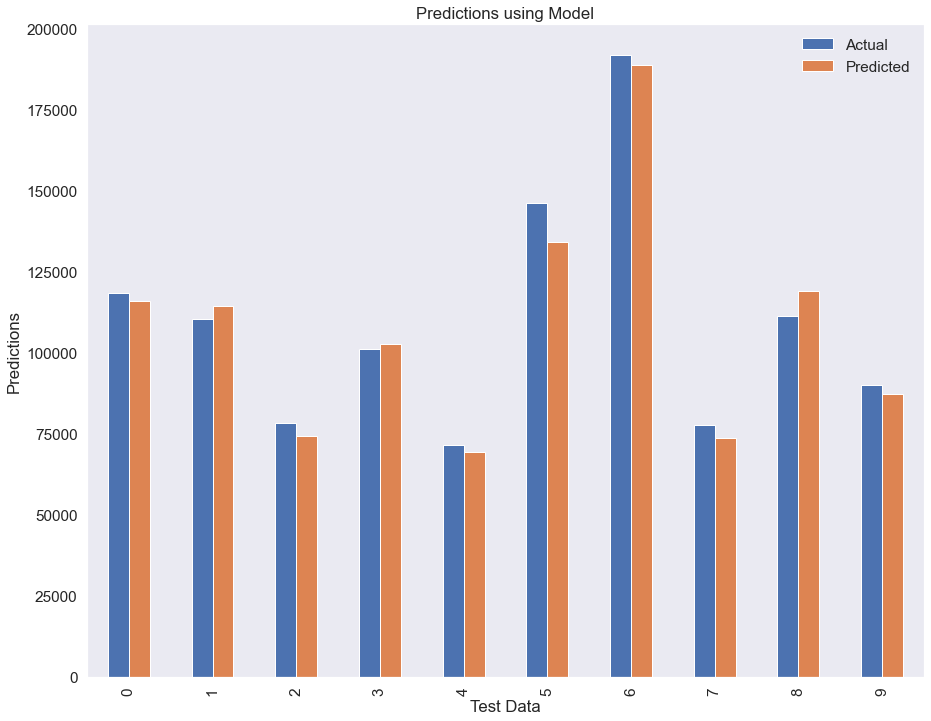

In [32]:
# plotting new df
df.plot(kind='bar',figsize=(15,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Test Data')
plt.ylabel('Predictions')
plt.title('Predictions using Model')
plt.show()

60


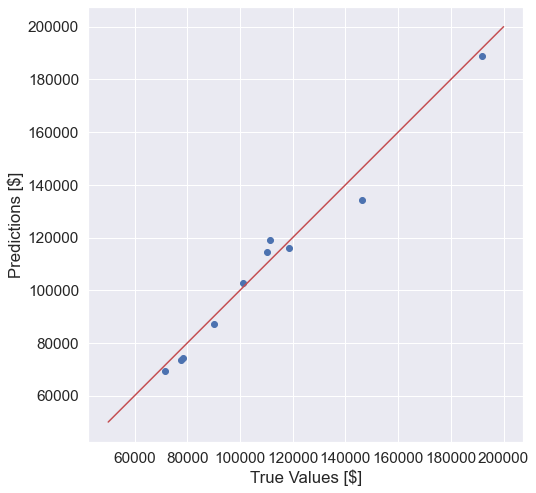

In [33]:
# pritting diff between pred. and actual values
print(X_test.size)
plt.figure(figsize = (8,8))
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [$]')
plt.ylabel('Predictions [$]')
# for the line
plt.plot([50000,200000], [50000,200000], 'r')
plt.show()

In [34]:
# printing score
print("R Squared on predictions: {}".format(r2_score(y_test, y_pred)))

R Squared on predictions: 0.9770101039168719


In [35]:
# printing mean
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared on predictions {}".format(mse))
print("Root Mean Squared on predictions {}".format(np.sqrt(mse)))

Mean Squared on predictions 27767513.499568887
Root Mean Squared on predictions 5269.48892204632
